In [2]:
source("../src/plot_over_months_by_station.R")
source("../src/plot_station_avg_by_month.R")
source("../src/plot_boxplot_by_season.R")

In [3]:
data <- read.csv("../data/observations.csv", header = TRUE, sep = ",")
print(dim(data))  # Print the dimensions of the data frame

[1] 1719567      66


In [4]:
stations <-read.csv("../data/stations.csv", header = TRUE, sep = ",")
print(dim(stations))  # Print the dimensions of the data frame

[1] 62 12


In [18]:
summary(data)


 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1719567     Min.   : 93850        
 1st Qu.: 7207   Class :character   1st Qu.:101180        
 Median : 7577   Mode  :character   Median :101600        
 Mean   :26062                      Mean   :101577        
 3rd Qu.:61976                      3rd Qu.:102090        
 Max.   :89642                      Max.   :107570        
                                    NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.000               
 1st Qu.:  -60.00                  1st Qu.: 2.000               
 Median :   10.00                  Median : 3.000               
 Mean   :   15.39                  Mean   : 4.297               
 3rd Qu.:   90.00                  3rd Qu.: 7.000               
 Max.   : 2990.00                  Max.   :10.000               
 NA's   :40694                     NA's   :68236                
 Directi

📍 Sélection des stations:

Nord : 7015 – Fretin (59, Hauts-de-France)

Centre (Île-de-France) : 7149 – Athis-Mons (91, Essonne)

Ouest : 7110 – Guipavas (29, Finistère)

Est : 7190 – Holtzheim (67, Bas-Rhin)

Sud-Est : 7650 – Marignane (13, Bouches-du-Rhône)

Sud-Ouest (Occitanie) : 7630 – Blagnac (31, Haute-Garonne)

Warning message:
“Removed 114 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 133 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 135 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4207 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 121 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 72772 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


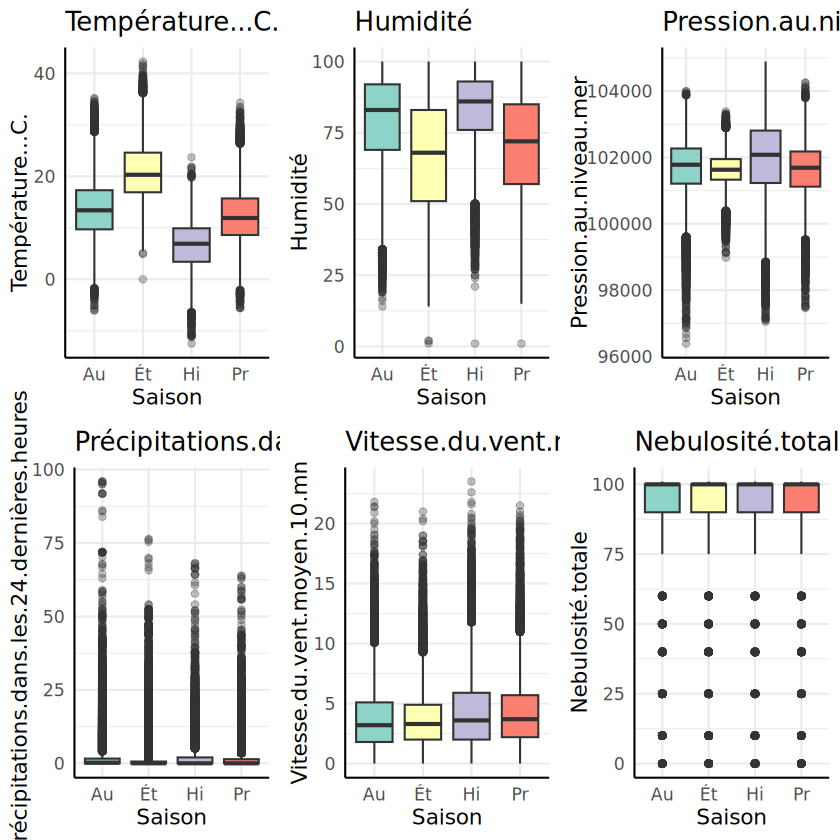

In [48]:
# library(gridExtra)

# stations_a_comparer <- c(7015, 7149, 7110, 7190, 7650, 7630)

# # Variables météo sélectionnées
# vars <- c("Température...C.", 
#           "Humidité", 
#           "Pression.au.niveau.mer", 
#           "Précipitations.dans.les.24.dernières.heures", 
#           "Vitesse.du.vent.moyen.10.mn", 
#           "Nebulosité.totale")

# Générer une liste de plots
plots <- lapply(vars, function(v) {
  plot_boxplot_by_season(data, 
                             stations = stations_a_comparer, 
                             variable = v)
})

# Afficher en grille 3x2
grid.arrange(grobs = plots, ncol = 3, nrow = 2)


In [6]:
# Codes Insee des régions métropolitaines (hors DROM-COM)
codes_metropole <- c(11, 24, 27, 28, 32, 44, 52, 53, 75, 76, 84, 94) 


stations_metropole <- stations %>% 
  filter(region..code. %in% codes_metropole)

# Récupérer la liste des ID de stations métropolitaines
id_metropole <- stations_metropole$ID.OMM.station

# ---- 2. Charger la base observations météo ----
# exemple : data <- read.csv("observations.csv")

# Filtrer uniquement les observations de France métropolitaine
data_metropole <- data %>% 
  filter(ID.OMM.station %in% id_metropole)

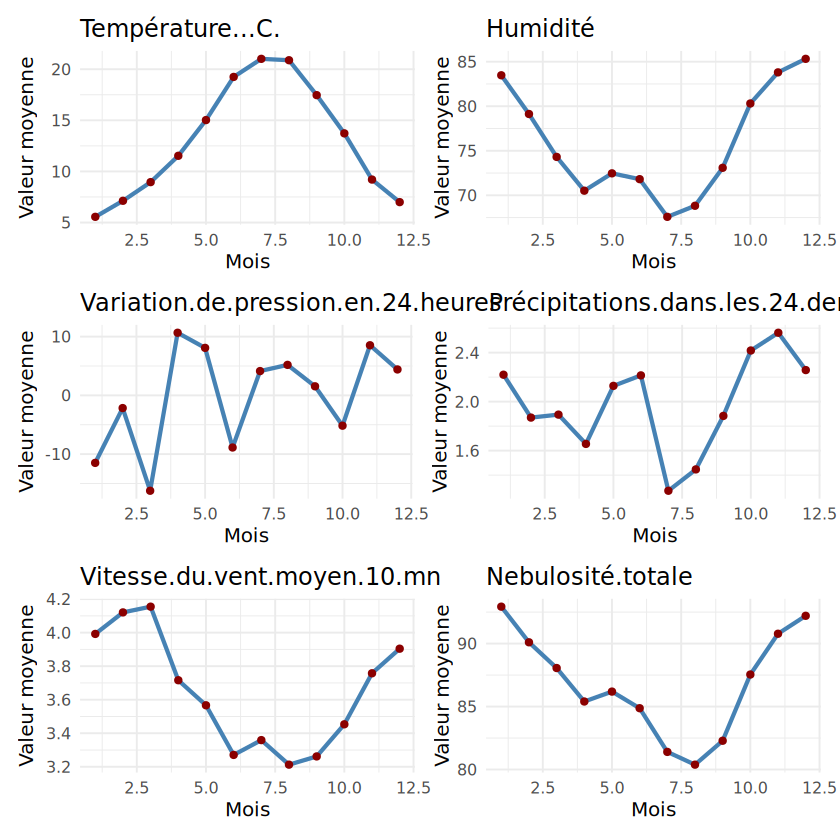

In [ ]:
library(dplyr)
library(ggplot2)
library(patchwork)

library(dplyr)

# ---- 1. Charger la base des métadonnées stations (communes/régions) ----
# exemple : stations <- read.csv("stations.csv")



# Variables sélectionnées
vars <- c("Température...C.", 
          "Humidité", 
          "Variation.de.pression.en.24.heures", 
          "Précipitations.dans.les.24.dernières.heures", 
          "Vitesse.du.vent.moyen.10.mn", 
          "Nebulosité.totale")

# Générer les graphiques
plots <- lapply(vars, function(v) {
  data_metropole %>%
    group_by(mois_de_l_annee) %>%
    summarise(val_moy = mean(.data[[v]], na.rm = TRUE)) %>%
    ggplot(aes(x = mois_de_l_annee, y = val_moy)) +
    geom_line(color = "steelblue", size = 1.2) +
    geom_point(color = "darkred") +
    theme_minimal(base_size = 12) +
    labs(title = paste(v),
         x = "Mois",
         y = "Valeur moyenne")
})

# ⚡ Organiser en grille 3 x 2
(plots[[1]] | plots[[2]]) / 
(plots[[3]] | plots[[4]]) / 
(plots[[5]] | plots[[6]])


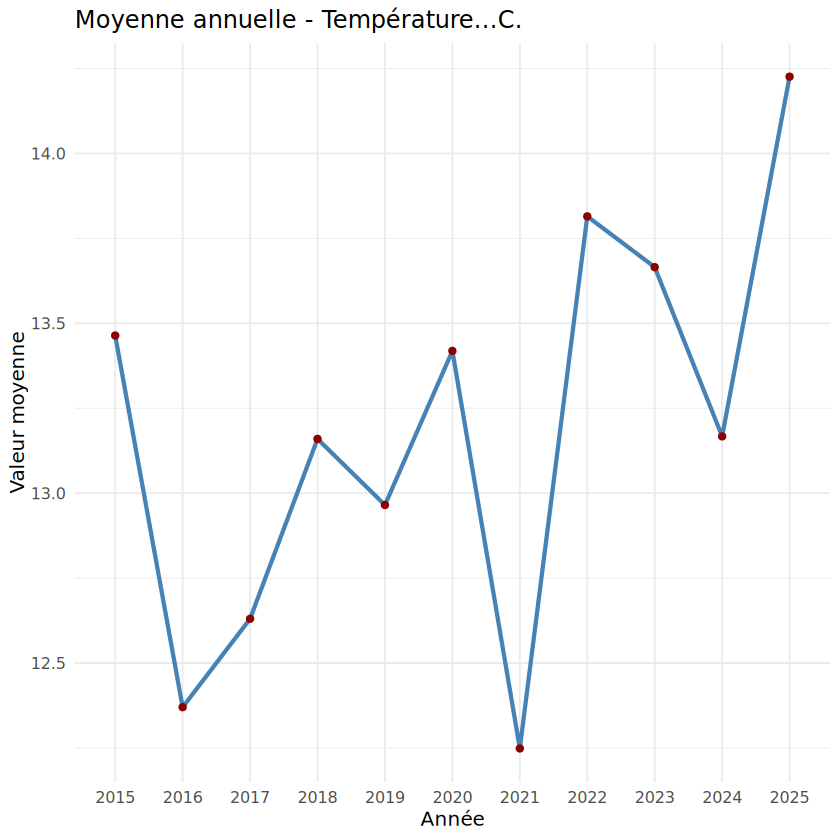

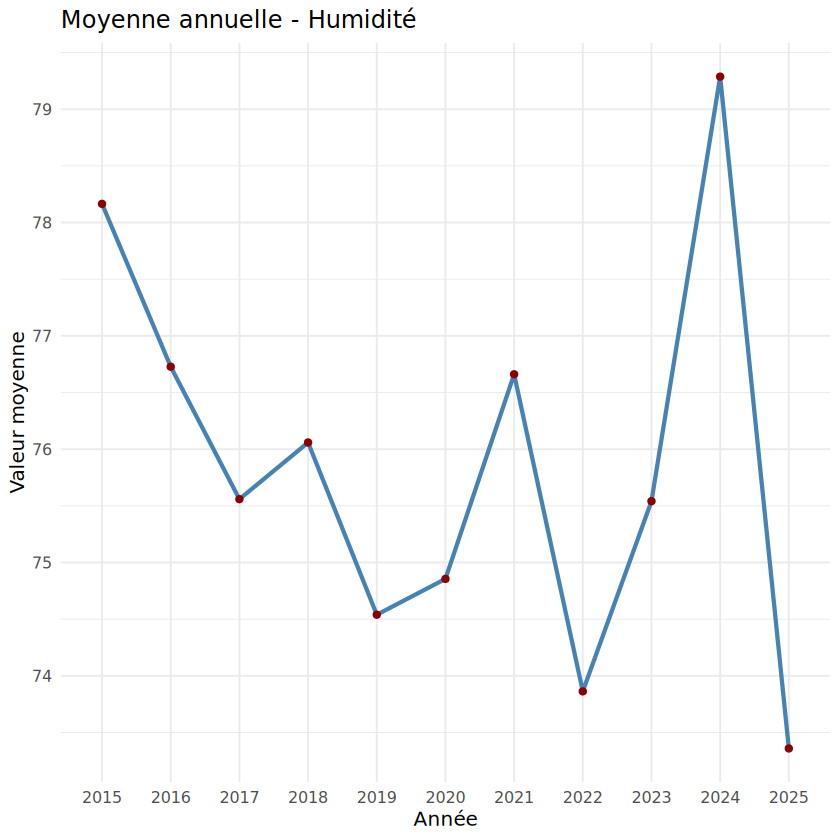

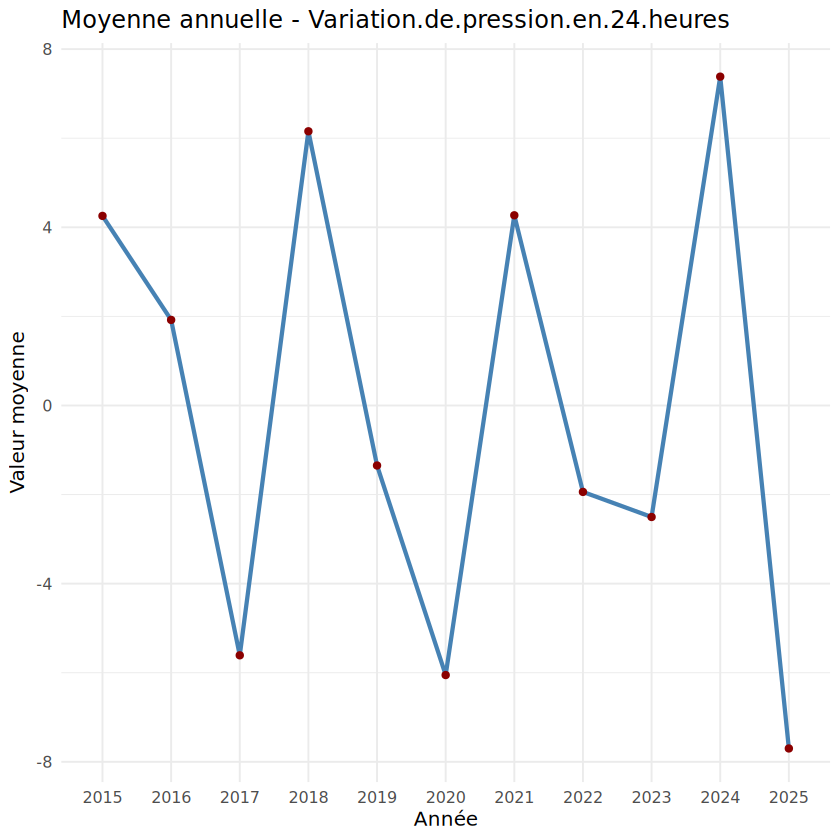

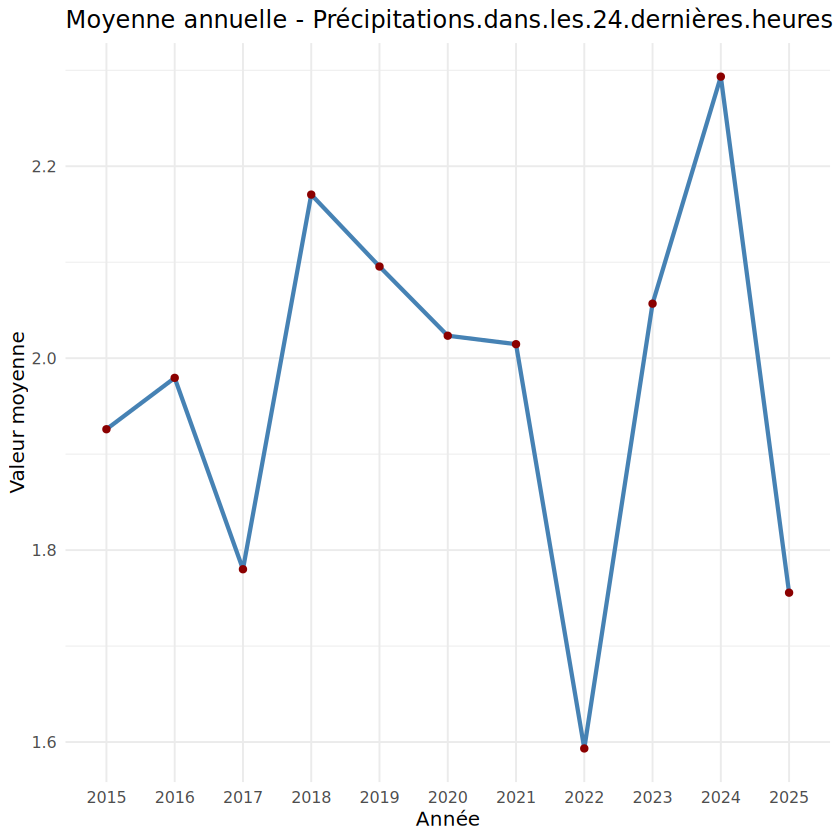

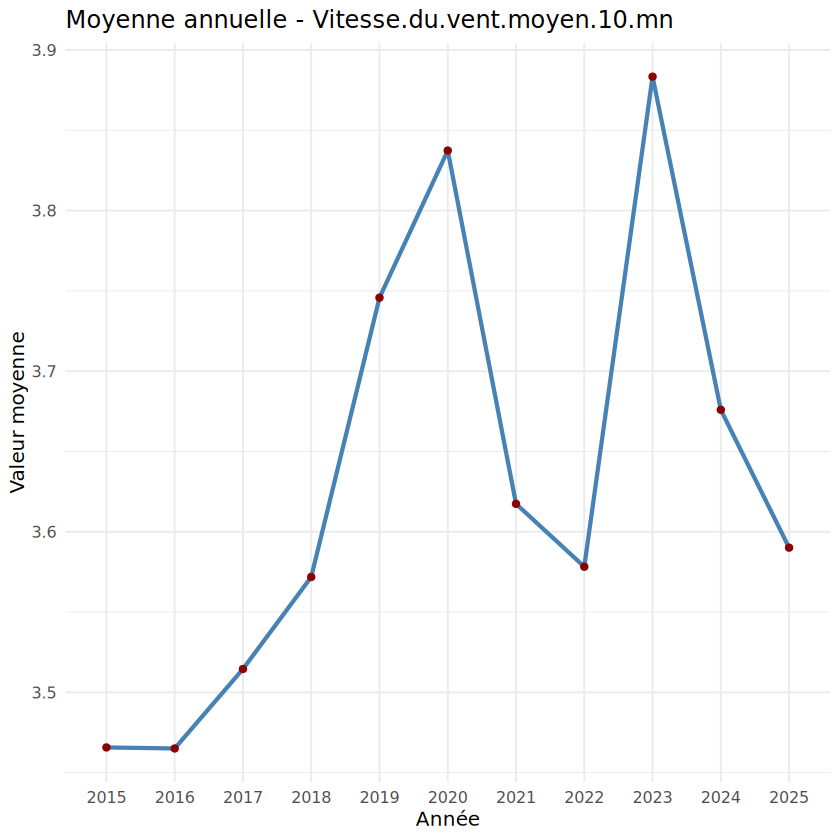

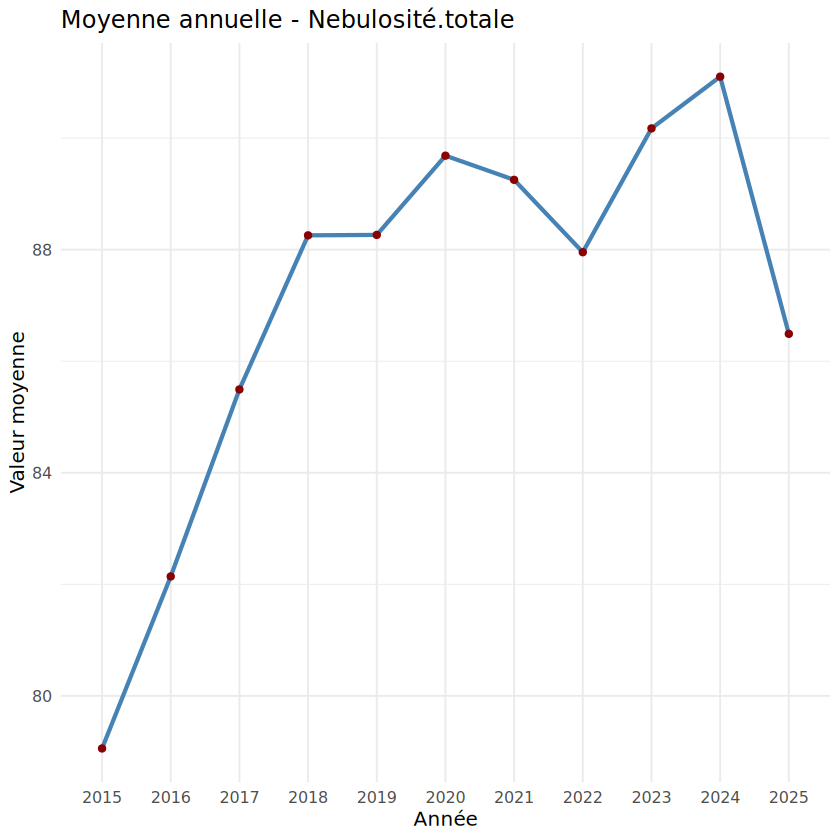

In [13]:
library(dplyr)
library(ggplot2)
library(patchwork)
# La colonne Date est de type caractère (ex: "2018-04-04T05:00:00+02:00")
data_metropole <- data_metropole %>%
  mutate(annee = format(as.Date(substr(Date, 1, 10)), "%Y"))

# ---- Générer graphiques : moyennes par année ----
plots <- lapply(vars, function(v) {
  data_metropole %>%
    group_by(annee) %>%
    summarise(val_moy = mean(.data[[v]], na.rm = TRUE)) %>%
    ggplot(aes(x = annee, y = val_moy, group = 1)) +
    geom_line(color = "steelblue", size = 1.2) +
    geom_point(color = "darkred") +
    theme_minimal(base_size = 12) +
    labs(title = paste("Moyenne annuelle -", v),
         x = "Année",
         y = "Valeur moyenne")
})

# ---- Organiser en grille 3 x 2 ----
(plots[[1]]) 
(plots[[2]])  
(plots[[3]]) 
(plots[[4]])  
(plots[[5]])
(plots[[6]])




## Regression
### Régression simple :Température ~ Humidité


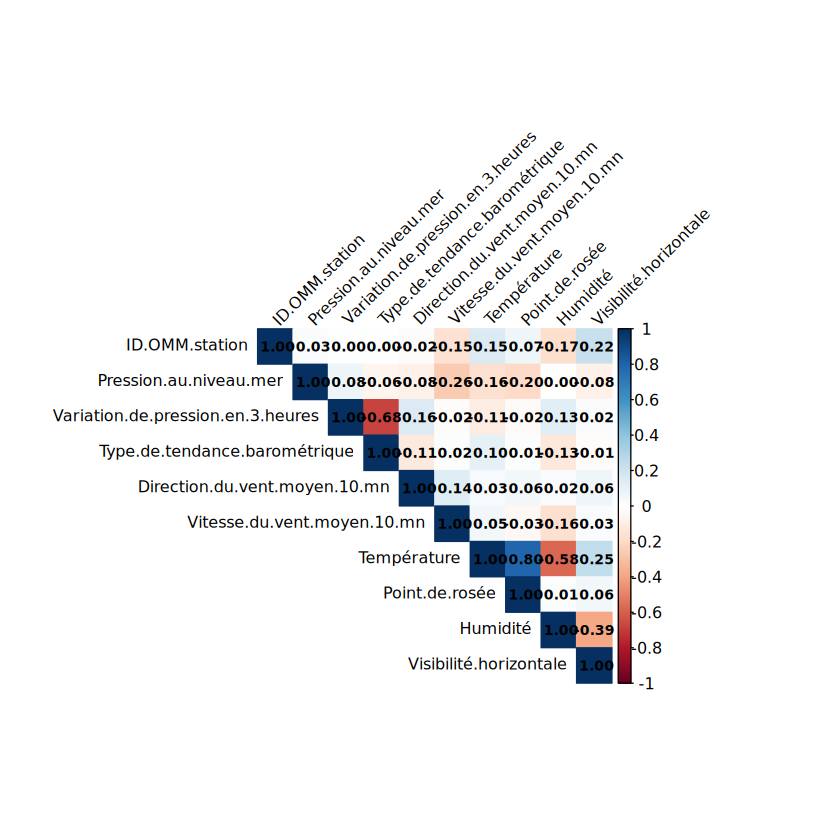

In [31]:
library(corrplot)
library(dplyr)
par(bg='white')
# Sélectionner uniquement les colonnes numériques
vars_num <- data_metropole %>% 
  select(where(is.numeric))

# Garder seulement les 10 premières colonnes numériques (optionnel)
vars_num <- vars_num[, 1:10]

# Corrélation
mat_cor <- cor(vars_num, use = "pairwise.complete.obs")

# Sauvegarde dans une grande image
# png("../fig/corrplot2.png", width = 1200, height = 1200, res = 150)

corrplot(mat_cor, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45, 
         tl.cex = 0.8,         # taille du texte des labels
         addCoef.col = "black", 
         number.cex = 0.7)

# dev.off()


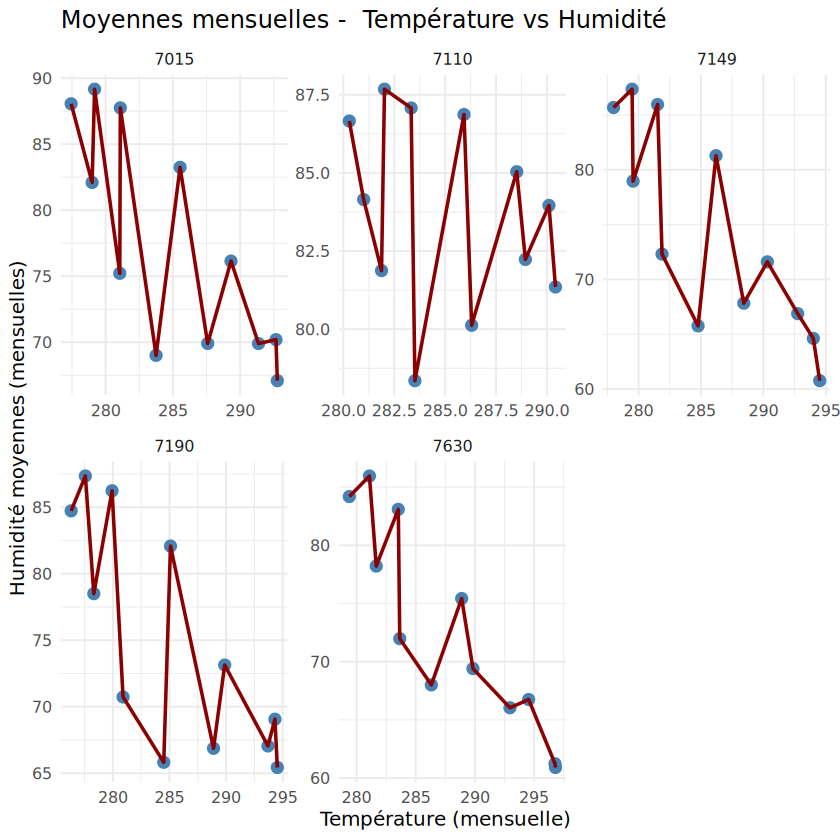

In [32]:
par(bg='white')


library(dplyr)
library(ggplot2)

stations_a_comparer <- c(7015, 7149, 7110, 7190,7630)

# Calculer la moyenne mensuelle par station
data_monthly <- data_metropole %>%
  filter(ID.OMM.station %in% stations_a_comparer) %>%
  group_by(ID.OMM.station, mois_de_l_annee) %>%
  summarise(
    Température_moy = mean(Température, na.rm = TRUE),
    Humidité_moy = mean(Humidité, na.rm = TRUE),
    .groups = "drop"
  )


# Plot : Visibilité vs Précipitations, facetté par station
ggplot(data_monthly, aes(x = Température_moy, y = Humidité_moy)) +
  geom_point(color = "steelblue", size = 3) +
  geom_line(color = "darkred", size = 1) +
  theme_minimal(base_size = 12) +
  labs(title = "Moyennes mensuelles -  Température vs Humidité",
       x = "Température (mensuelle)",
       y = "Humidité moyennes (mensuelles)") +
  facet_wrap(~ ID.OMM.station, scales = "free")



`geom_smooth()` using formula = 'y ~ x'


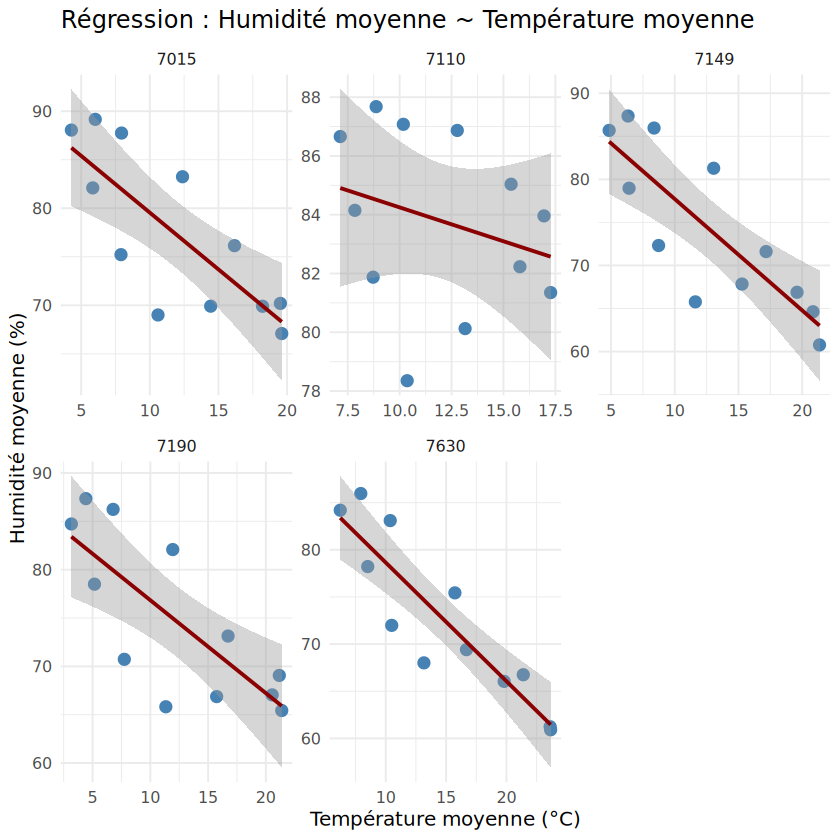

In [33]:
library(dplyr)
library(ggplot2)

stations_a_comparer <- c(7015, 7149, 7110, 7190, 7650, 7630)

# 1. Calculer les moyennes mensuelles de Température et Humidité par station
data_monthly <- data_metropole %>%
  filter(ID.OMM.station %in% stations_a_comparer) %>%
  group_by(ID.OMM.station, mois_de_l_annee) %>%
  summarise(
    Temp_moy = mean(Température...C., na.rm = TRUE),
    Humid_moy = mean(Humidité, na.rm = TRUE),
    .groups = "drop"
  )

# 2. Plot avec régression linéaire par station
ggplot(data_monthly, aes(x = Temp_moy, y = Humid_moy)) +
  geom_point(color = "steelblue", size = 3) +
  geom_smooth(method = "lm", se = TRUE, color = "darkred") +
  theme_minimal(base_size = 12) +
  labs(title = "Régression : Humidité moyenne ~ Température moyenne",
       x = "Température moyenne (°C)",
       y = "Humidité moyenne (%)") +
  facet_wrap(~ ID.OMM.station, scales = "free")


On trouve bien une relation linéraire entre la moyenne de la température par mois et la moyenne de  l'humidité par mois pour la plupart des stations testées 

### Régression multiple:Vent_moy ~ Latitude_scaled + Longitude_scaled


Call:
lm(formula = Vent_moy ~ Latitude_scaled + Longitude_scaled, data = data_yearly)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6785 -0.5859 -0.1752  0.4998  3.3198 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.63948    0.04303  84.581  < 2e-16 ***
Latitude_scaled   0.24569    0.04467   5.500 6.66e-08 ***
Longitude_scaled -0.42294    0.04467  -9.468  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8797 on 415 degrees of freedom
Multiple R-squared:  0.2764,	Adjusted R-squared:  0.2729 
F-statistic: 79.26 on 2 and 415 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


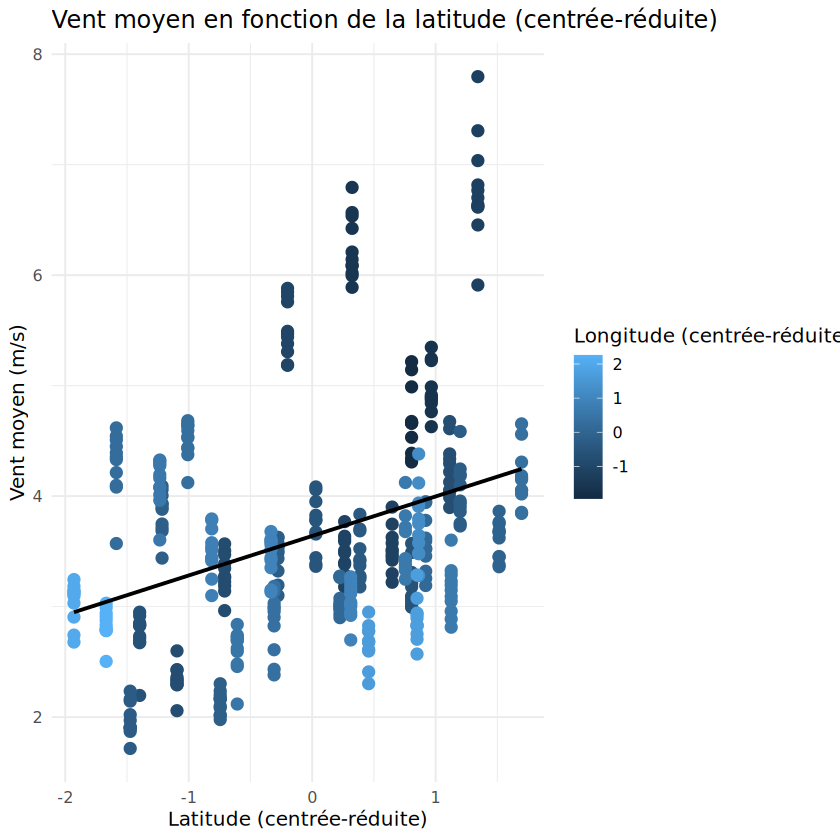

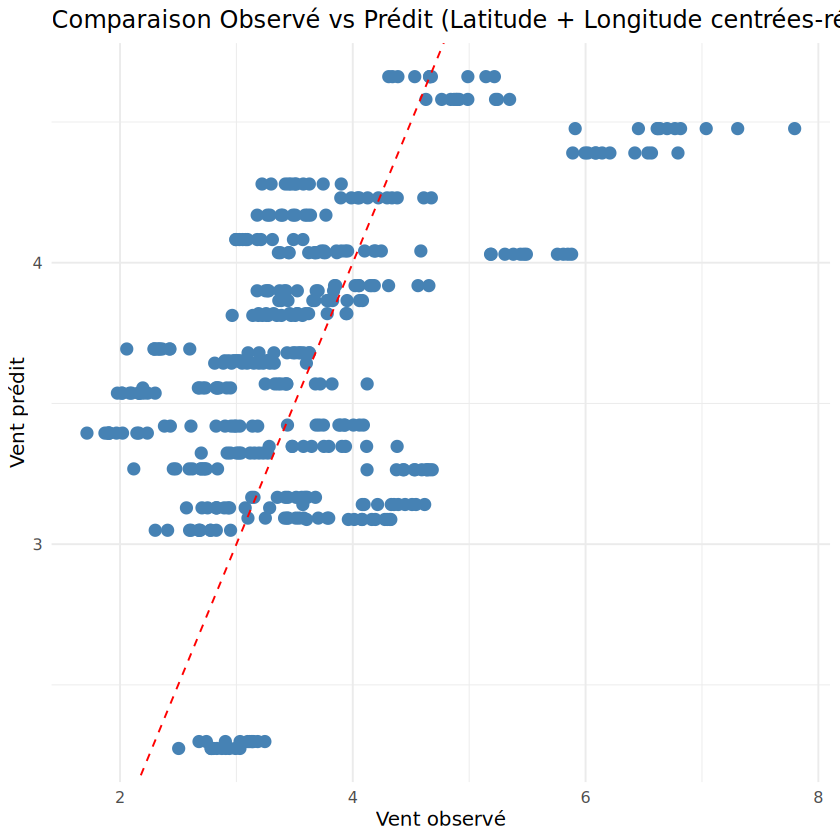

In [41]:
library(dplyr)
library(ggplot2)

# 1. Extraire l'année
data_metropole <- data_metropole %>%
  mutate(annee = format(as.Date(substr(Date, 1, 10)), "%Y"))

# 2. Moyenne annuelle par station
data_yearly <- data_metropole %>%
  group_by(ID.OMM.station, annee, Latitude, Longitude) %>%
  summarise(
    Vent_moy = mean(Vitesse.du.vent.moyen.10.mn, na.rm = TRUE),
    .groups = "drop"
  )

# 3. Centrer et réduire Latitude & Longitude
data_yearly <- data_yearly %>%
  mutate(
    Latitude_scaled  = scale(Latitude, center = TRUE, scale = TRUE)[,1],
    Longitude_scaled = scale(Longitude, center = TRUE, scale = TRUE)[,1]
  )

# 4. Régression avec X centrés-réduits
modele_geo_scaled <- lm(Vent_moy ~ Latitude_scaled + Longitude_scaled, data = data_yearly)

# Résultats
summary(modele_geo_scaled)

# 5. Prédictions
data_yearly$Pred <- predict(modele_geo_scaled, newdata = data_yearly)

# ---- Plot 1 : Vent vs Latitude centrée-réduite (couleur = Longitude centrée-réduite) ----
ggplot(data_yearly, aes(x = Latitude_scaled, y = Vent_moy, color = Longitude_scaled)) +
  geom_point(size = 3) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  theme_minimal(base_size = 12) +
  labs(title = "Vent moyen en fonction de la latitude (centrée-réduite)",
       x = "Latitude (centrée-réduite)", y = "Vent moyen (m/s)",
       color = "Longitude (centrée-réduite)")

# ---- Plot 2 : Observé vs Prédit ----
ggplot(data_yearly, aes(x = Vent_moy, y = Pred)) +
  geom_point(color = "steelblue", size = 3) +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  theme_minimal(base_size = 12) +
  labs(title = "Comparaison Observé vs Prédit (Latitude + Longitude centrées-réduites)",
       x = "Vent observé", y = "Vent prédit")


### Régression multiple :Visibilite ~ Precip + Humid_moy + Rafale_moy


Call:
lm(formula = Visibilite ~ Precip + Humid_moy + Rafale_moy, data = data_yearly)

Residuals:
     Min       1Q   Median       3Q      Max 
-15015.1  -5753.0    320.2   4909.1  16727.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 89866.96    5332.33  16.853  < 2e-16 ***
Precip       6761.11   15485.41   0.437    0.663    
Humid_moy    -760.83      75.96 -10.016  < 2e-16 ***
Rafale_moy  -1342.85     238.18  -5.638 3.19e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6714 on 413 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2965,	Adjusted R-squared:  0.2914 
F-statistic: 58.03 on 3 and 413 DF,  p-value: < 2.2e-16


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


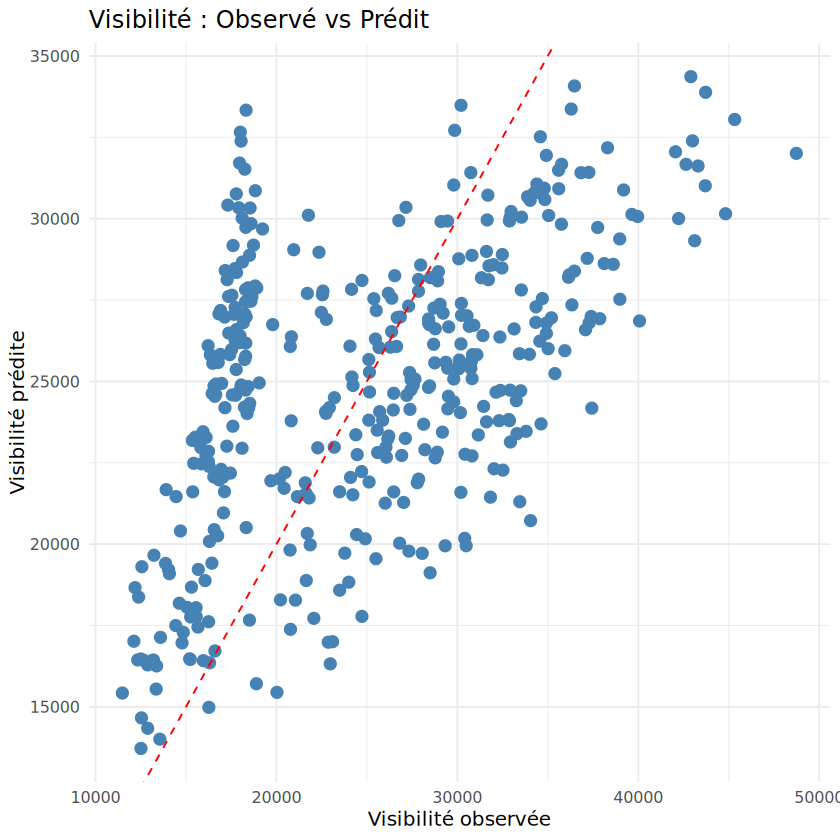

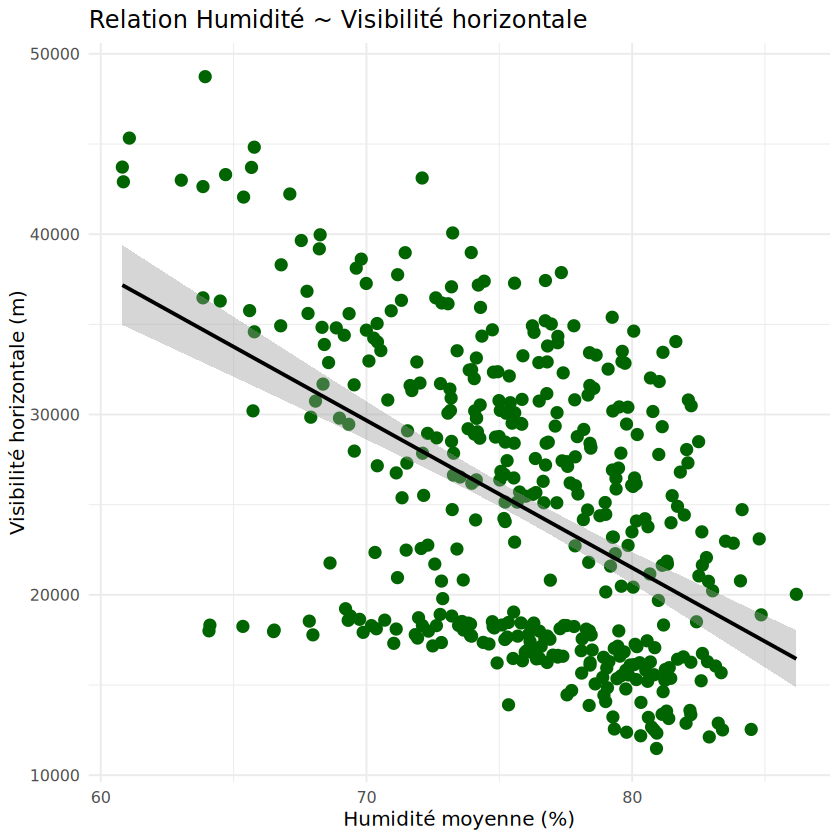

In [44]:
library(dplyr)
library(ggplot2)

# 1. Préparer les données annuelles par station
data_yearly <- data_metropole %>%
  group_by(ID.OMM.station, annee) %>%
  summarise(
    Visibilite = mean(Visibilité.horizontale, na.rm = TRUE),
    Precip     = mean(Précipitations.dans.la.dernière.heure, na.rm = TRUE),
    Humid_moy  = mean(Humidité, na.rm = TRUE),
    Rafale_moy = mean(Rafale.sur.les.10.dernières.minutes, na.rm = TRUE),
    .groups = "drop"
  )

# 2. Régression multiple
modele_visib <- lm(Visibilite ~ Precip + Humid_moy + Rafale_moy, data = data_yearly)

# 3. Résultats du modèle
summary(modele_visib)

# 4. Ajouter prédictions
data_yearly$Pred <- predict(modele_visib, newdata = data_yearly)

# ---- Plot 1 : Observé vs Prédit ----
ggplot(data_yearly, aes(x = Visibilite, y = Pred)) +
  geom_point(color = "steelblue", size = 3) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  theme_minimal(base_size = 12) +
  labs(title = "Visibilité : Observé vs Prédit",
       x = "Visibilité observée", 
       y = "Visibilité prédite")

# ---- Plot 2 : Effet partiel Humidité vs Visibilité ----
ggplot(data_yearly, aes(x = Humid_moy, y = Visibilite)) +
  geom_point(color = "darkgreen", size = 3) +
  geom_smooth(method = "lm", se = TRUE, color = "black") +
  theme_minimal(base_size = 12) +
  labs(title = "Relation Humidité ~ Visibilité horizontale",
       x = "Humidité moyenne (%)", 
       y = "Visibilité horizontale (m)")
